<a href="https://colab.research.google.com/github/Toxxi-frank/Deeplearning/blob/main/Lab2_MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
!pip install mitdeeplearning

     |████████████████████████████████| 2.1MB 6.5MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-cp37-none-any.whl size=2115442 sha256=fad449f8d149f3a9b29616f6b45e95609784ac60b37d73ab64068915d1feb5f6
  Stored in directory: /root/.cache/pip/wheels/af/dc/2a/5c3633135e7e4ef4fd31463cfa1942cb1bae7486ab94e7a2ad
Successfully built mitdeeplearning


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import mitdeeplearning as mdl


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# tải dataset về và chia ra thành 2 phần

In [ ]:
train_images= (np.expand_dims(train_images, axis = -1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis =-1)/255.).astype(np.float32)
test_labes = (test_labels).astype(np.int64)

Our training set is made up of 28x28 grayscale images of handwritten digits.

Let's visualize what some of these images and their corresponding training labels look like.

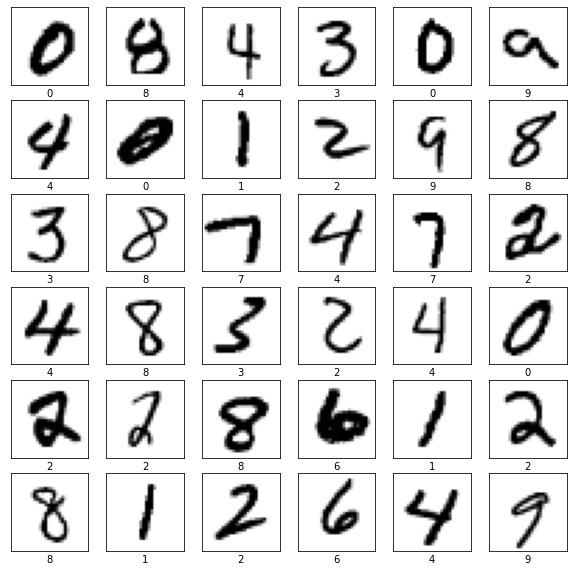

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap = plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model
model = build_fc_model

# cái này bị sai ở chỗ nào đấy? Đây là viết theo hướng dẫn
# làm cho dòng compile không chạy được

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# apply this to replace things above


Let's take a step back and think about the network we've just created. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are fully-connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model!

In [ ]:
learning_rate = 1e-1
opt = SGD(learning_rate=learning_rate)

In [ ]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.layers import Conv2D
import matplotlib.pyplot as plt

from keras.utils import to_categorical



In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE =64
EPOCHS = 5

In [ ]:
model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS )

Epoch 1/5


ValueError: ignored

In [ ]:
test_loss, test_acc = model.evalute(test_images, test_labels)
print('Test accuracy: ', test_acc)

AttributeError: ignored

In [ ]:

def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu), 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2))

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        '''TODO: Dense layer to output classification probabilities'''
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

SyntaxError: ignored

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
cnn_model.predict(train_images[[0]])

array([[5.11539075e-11, 1.01027801e-07, 7.39842898e-09, 1.25244372e-02,
        1.09413555e-10, 9.87469673e-01, 1.41892909e-09, 2.49264680e-08,
        5.33168213e-06, 3.85356003e-07]], dtype=float32)

In [ ]:
a =cnn_model.predict(train_images[[0]])

In [ ]:
b = np.argmax(a)

In [ ]:
print(b)

5


Train and test the CNN mode

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.fit(train_images, train_labels,batch_size = BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 33s 35ms/step - loss: 0.4223 - accuracy: 0.8761
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0596 - accuracy: 0.9817
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0398 - accuracy: 0.9874
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0237 - accuracy: 0.9927


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0264 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


In [ ]:

predictions = cnn_model.predict(test_images)

In [ ]:
predictions[0]

array([6.1536061e-09, 7.3376971e-10, 1.0466365e-07, 2.5223216e-08,
       7.6726951e-11, 9.4229402e-10, 3.0164951e-14, 9.9999952e-01,
       1.6993414e-07, 2.0212133e-07], dtype=float32)

In [ ]:
predictions[10]

array([9.9999046e-01, 1.5840336e-11, 3.1829793e-06, 8.2627072e-10,
       2.5017479e-09, 2.4431296e-08, 2.9382129e-06, 3.1116349e-09,
       4.0598121e-07, 3.0439096e-06], dtype=float32)

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [ ]:
prediction = np.argmax(predictions[0])

print(prediction)

7


In [ ]:
result = np.argmax(predictions[10])
print(result)

0


We can check the test label (remember, this is the true identity of the digit) to see if this prediction is correct

Label of this digit is: 7


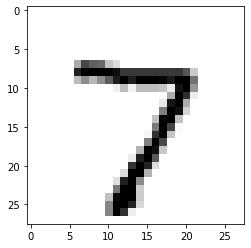

In [ ]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)


It is! Let's visualize the classification results on the MNIST dataset. We will plot images from the test dataset along with their predicted label, as well as a histogram that provides the prediction probabilities for each of the digits:

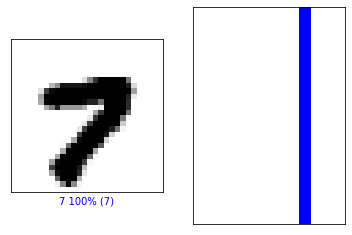

In [ ]:
image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are grey. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

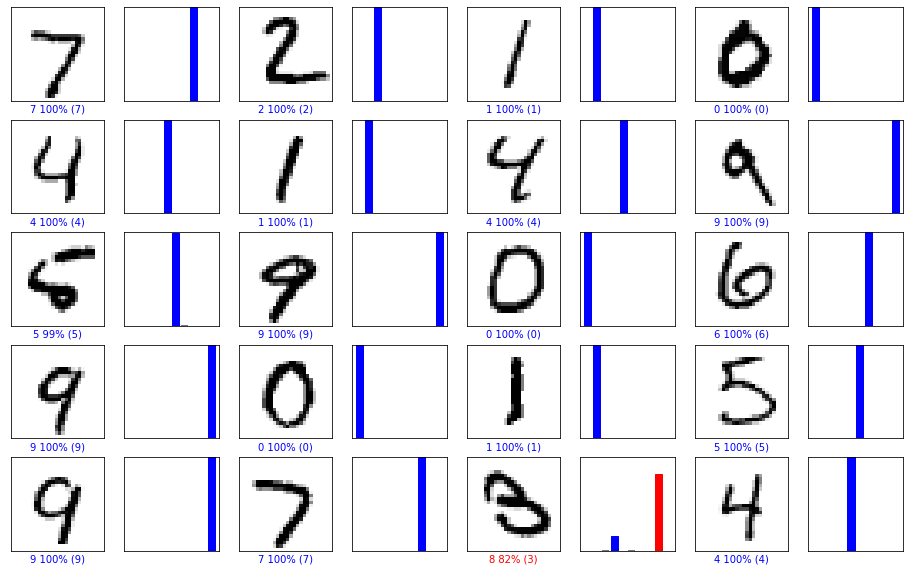

In [ ]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)